In [52]:
#!pip3 install psycopg2
#!pip install seaborn

In [49]:
# Dependencies and Setup
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
#from password import password
from scipy import stats
import os
import psycopg2 as pg2

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# import data set to df
df = pd.read_csv('database.csv')
df.head()

C:\Users\sandy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
# drop unneeded columns
df = df.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'Record ID', 'Victim Count', 'Perpetrator Count', 'Record Source'])
df.head()

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown


In [6]:
df.to_csv('homicide_info.csv')
df.to_csv('C:/Users/Sandy/Desktop/homicide_info.csv')

In [7]:
base_homicide_info= df.drop(columns=['City', 'Month','Incident', 'Crime Solved'])
base_homicide_info.head()

,State,Year,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Alaska,1980,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Alaska,1980,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Alaska,1980,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Alaska,1980,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Alaska,1980,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown


In [9]:
base_homicide_info.to_csv('base_homicide_info.csv')
base_homicide_info.to_csv('C:/Users/Sandy/Desktop/file_name.csv')

In [10]:
Victim_info = base_homicide_info.drop(columns=['Crime Type', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity'])
Victim_info.head()

,State,Year,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Relationship,Weapon
0,Alaska,1980,Male,14,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Alaska,1980,Male,43,White,Unknown,Acquaintance,Strangulation
2,Alaska,1980,Female,30,Native American/Alaska Native,Unknown,Unknown,Unknown
3,Alaska,1980,Male,43,White,Unknown,Acquaintance,Strangulation
4,Alaska,1980,Female,30,Native American/Alaska Native,Unknown,Unknown,Unknown


In [11]:
Victim_info = base_homicide_info.drop(columns=['Crime Type', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity'])
Victim_info.head()

,State,Year,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Alaska,1980,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Alaska,1980,Male,42,White,Unknown,Acquaintance,Strangulation
2,Alaska,1980,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Alaska,1980,Male,42,White,Unknown,Acquaintance,Strangulation
4,Alaska,1980,Unknown,0,Unknown,Unknown,Unknown,Unknown


In [12]:
Victim_info.to_csv('Victim_info.csv')
Victim_info.to_csv('C:/Users/Sandy/Desktop/Victim_info.csv')

In [13]:
df.set_index('State')

,City,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
State,,,,,,,,,,,,,,,,
Alaska,Anchorage,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
Alaska,Anchorage,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
Alaska,Anchorage,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
Alaska,Anchorage,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
Alaska,Anchorage,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,Park,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
Wyoming,Sheridan,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
Wyoming,Sheridan,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation


In [14]:
df.set_index('Year')

,City,State,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
Year,,,,,,,,,,,,,,,,
1980,Anchorage,Alaska,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1980,Anchorage,Alaska,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
1980,Anchorage,Alaska,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
1980,Anchorage,Alaska,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
1980,Anchorage,Alaska,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Park,Wyoming,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
2014,Sheridan,Wyoming,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
2014,Sheridan,Wyoming,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation


In [15]:
State_year_count= df.groupby(['Year','State']).agg({'Year':['count']})
State_year_count.reset_index(inplace = True)
State_year_count.head()

,Year,State,Year
,,,count
0,1980,Alabama,513
1,1980,Alaska,47
2,1980,Arizona,293
3,1980,Arkansas,214
4,1980,California,3590


In [16]:
State_year_count.set_index('State')

Year      
                    count
State                    
Alabama        1980   513
Alaska         1980    47
Arizona        1980   293
Arkansas       1980   214
California     1980  3590
...             ...   ...
Virginia       2014   354
Washington     2014   206
West Virginia  2014    74
Wisconsin      2014   171
Wyoming        2014    14

[1759 rows x 2 columns]

In [60]:
State_year_count.columns

MultiIndex([( 'Year',      ''),
            ('State',      ''),
            ( 'Year', 'count')],
           )

In [56]:
State_year_count.describe()

Year             
                          count
count  1759.000000  1759.000000
mean   1997.014213   362.964184
std      10.146667   531.570105
min    1980.000000     1.000000
25%    1988.000000    48.500000
50%    1997.000000   187.000000
75%    2006.000000   452.000000
max    2014.000000  4369.000000

In [18]:
State_year_count.to_csv('State_year_count.csv')
State_year_count.to_csv('C:/Users/Sandy/Desktop/State_year_count.csv')

In [19]:
# import data set to df
data_file = "universities_ranking.xlsx"
education_df = pd.read_excel(data_file, engine='openpyxl')
# Apply the function
education_df = education_df.replace(np.nan, 0)
education_df.head()

,University Name,IPEDS ID,State,2021,2020,2019,2018,2017,2016,2015,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Harvard University,166027,Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,Columbia University,190150,New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,0.0,0.0
3,Massachusetts Institute of Technology,166683,Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,Yale University,130794,Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


In [20]:
# drop unneeded columns
drop_education_df = education_df.drop(columns=['University Name', 'IPEDS ID'])
# Apply the function
drop_education_df = drop_education_df.replace(np.nan, 0)
drop_education_df= drop_education_df.set_index('State')

In [21]:
# transpose the dataframe
df_transposed = drop_education_df.T 
df_transposed.head()

State,New Jersey,Massachusetts,New York,Massachusetts,Connecticut,Illinois,California,Pennsylvania,Maryland,Illinois,...,Flordia,New York,Pennsylvania,DC,Pennsylvania,New Jersey,New York,Texas,Washington,Illinois
2021,1.0,2.0,3.0,4.0,4.0,6.0,6.0,8.0,9.0,9.0,...,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,1.0,2.0,3.0,3.0,3.0,6.0,6.0,6.0,10.0,9.0,...,0.0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,1.0,2.0,3.0,3.0,3.0,3.0,7.0,8.0,10.0,10.0,...,0.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,1.0,2.0,5.0,5.0,3.0,3.0,5.0,8.0,11.0,11.0,...,46.0,42.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,1.0,2.0,5.0,7.0,3.0,3.0,5.0,8.0,10.0,12.0,...,44.0,39.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_transposed.to_csv('Rate_of_University_by_State.csv')
df_transposed.to_csv('C:/Users/Sandy/Desktop/Rate_of_University_by_State.csv')

In [25]:
# import data set to df
df2 = pd.read_csv('homicide_per_year.csv')
df2.head()

,Year,Massachusetts,Connecticut,Illinois,Maryland,North Carolina,New Hampshire,Rhode Island,Tennessee,Montana,...,California,Virginia.1,Louisiana,Ohio,Texas,Wisconsin,Pennsylvania,New York,New Jersey,Washington
0,1995.0,1.0,3.0,8.0,22.0,6.0,8.0,11.0,15.0,20.0,...,4.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,1.0,0.0
1,1994.0,1.0,3.0,7.0,15.0,7.0,8.0,12.0,17.0,18.0,...,7.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1.0,0.0
2,1993.0,1.0,3.0,7.0,15.0,7.0,7.0,18.0,19.0,20.0,...,6.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,1.0,0.0
3,1992.0,1.0,2.0,8.0,11.0,7.0,8.0,17.0,17.0,18.0,...,6.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,2.0,0.0
4,1991.0,1.0,3.0,11.0,15.0,7.0,8.0,12.0,8.0,24.0,...,5.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,2.0,0.0


In [57]:
#df2.dtypes

In [33]:
df2['Year'] = df2['Year'].astype('Int64')

In [58]:
#df2.dtypes

In [35]:
df_transposed.head()

State,New Jersey,Massachusetts,New York,Massachusetts,Connecticut,Illinois,California,Pennsylvania,Maryland,Illinois,...,Flordia,New York,Pennsylvania,DC,Pennsylvania,New Jersey,New York,Texas,Washington,Illinois
2021,1.0,2.0,3.0,4.0,4.0,6.0,6.0,8.0,9.0,9.0,...,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,1.0,2.0,3.0,3.0,3.0,6.0,6.0,6.0,10.0,9.0,...,0.0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,1.0,2.0,3.0,3.0,3.0,3.0,7.0,8.0,10.0,10.0,...,0.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,1.0,2.0,5.0,5.0,3.0,3.0,5.0,8.0,11.0,11.0,...,46.0,42.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,1.0,2.0,5.0,7.0,3.0,3.0,5.0,8.0,10.0,12.0,...,44.0,39.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_transposed.to_csv('homicide_by_year.csv')
df_transposed.to_csv('C:/Users/Sandy/Desktop/homicide_by_year.csv')

In [38]:
df.describe()

,Year,Incident,Victim Age
count,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512
std,9.927693,92.149821,41.628306
min,1980.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000
50%,1995.000000,2.000000,30.000000
75%,2004.000000,10.000000,42.000000
max,2014.000000,999.000000,998.000000


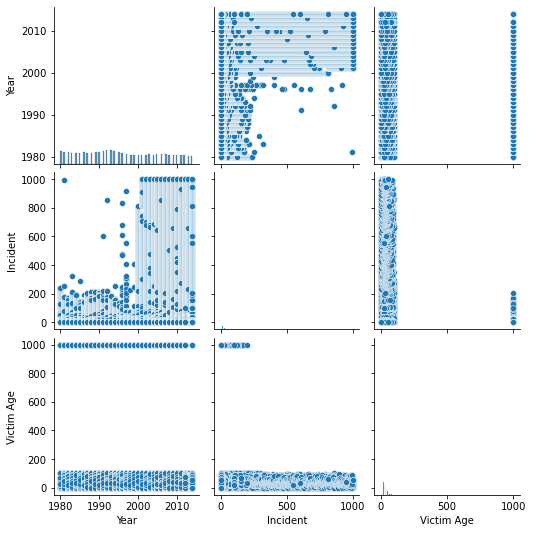

In [54]:
sns.pairplot(df)